<a href="https://colab.research.google.com/github/linhhn138/Customer_cancellation/blob/main/Customer_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


In [6]:
from ydata_profiling import ProfileReport

%matplotlib inline

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import math
import itertools
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

%cd '/content/gdrive/My Drive/Python'

Mounted at /content/gdrive/
/content/gdrive/My Drive/Python


In [8]:
df = pd.read_csv('Customer_cancellation/Customer_cancellation.csv')

#**Mục tiêu phân tích: Tìm hiểu ai rời bỏ, vì sao rời bỏ và các đặc điểm nào làm tăng khả năng churn.**


##**Khám phá và Xử lý dữ liệu**


In [9]:
df.shape

(7045, 39)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   float64
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   float64
 5   City                               7043 non-null   object 
 6   Number of Referrals                7043 non-null   float64
 7   Tenure in Months                   7043 non-null   float64
 8   Offer                              3166 non-null   object 
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  6361 non-null   float64
 11  Multiple Lines                     6361 non-null   objec

##*Phân tích tập dữ liệu Customer Cancellation*:
- Tập dữ liệu **Customer_cancellation.csv** có 7045 dòng và 39 cột. Trong đó số lượng cột biến phân loại là 22 và cột biến số lượng là 17.
- Tập dữ liệu có chứa thông tin về khách hàng sử dụng dịch vụ viễn thông và mạng với ý nghĩa các cột như sau:

  1. Customer ID: ID của mỗi khách hàng.
  2. Gender: Giới tính của khách hàng.
  3. Age: Tuổi của khách hàng.
  4. Married: Tình trạng hôn nhân của khách hàng.
  5. Number of Dependents: Số lượng người phụ thuộc.
  6. City: Thành phố của khách hàng.
  7. Number of Referrals: Số lượng người giới thiệu.
  8. Tenure in Months: Số tháng tham gia.
  9. Offer: Ưu đãi dành cho khách hàng.
  10. Phone Service: Dịch vụ điện thoại.
  11. Avg Monthly Long Distance Charges: Chi phí trung bình hàng tháng cho cuộc gọi đường dài.
  12. Multiple Lines: Nhiều số điện thoại.
  13. Internet Service: Dịch vụ Internet.
  14. Internet Type: Loại dịch vụ Internet.
  15. Avg Monthly GB Download: Dung lượng tải xuống trung bình hàng tháng (GB).
  16. Online Security: Bảo mật trực tuyến.
  17. Online Backup: Sao lưu trực tuyến.
  18. Device Protection Plan: Gói bảo vệ thiết bị.
  19. Premium Tech Support: Hỗ trợ kỹ thuật cao cấp.
  20. Streaming TV: Truyền hình trực tuyến.
  21. Streaming Movies: Xem phim trực tuyến.
  22. Streaming Music: Nghe nhạc trực tuyến.
  23. Unlimited Data: Dữ liệu không giới hạn.
  24. Contract: Loại hợp đồng.
  25. Payment Method: Phương thức thanh toán.
  26. Monthly Charge: Phí hàng tháng.
  27. Total Charges: Tổng phí đã trả.
  28. Total Refunds: Tổng tiền hoàn.
  29. Total Extra Data Charges: Tổng phí dữ liệu vượt mức.
  30. Total Long Distance Charges: Tổng phí gọi đường dài.
  31. Total Revenue: Tổng doanh thu.
  32. Customer Status:Trạng thái khách hàng.
  33. Churn Category: Nhóm nguyên nhân rời đi.
  34. Churn Reason: Lý do rời đi cụ thể.
  35. Churned: Biến mục tiêu (0/1).
  36. Stayed: Biến mục tiêu phụ (0/1).
  37. Unnamed: 36: Cột không có tiêu đề chứa toàn bộ dữ liệu trống.
  38. Unnamed: 37: Cột không có tiêu đề chứa toàn bộ dữ liệu trống.
  39. Unnamed: 38: Cột không có tiêu đề chứa toàn bộ dữ liệu trống.

##*Tiền xử lý dữ liệu*

Cần xử lý dữ liệu trước khi phân tích bằng biểu đồ:
  - Các cột có toàn bộ giá trị trống cần loại bỏ: ['Unnamed: 36'], ['Unnamed: 37'], ['Unnamed: 38'].
  - Dữ liệu có 7045 dòng nhưng số dòng có dữ liệu là 7043 dòng => có 2 dòng bị trống hoàn toàn => loại bỏ
  - Tạo Age Group để phân loại nhóm khách hàng theo độ tuổi của cột ['Age'].
  - Tạo Tenure Group để phân loại nhóm khách hàng theo nhóm thời gian tham gia.
  - Cột Offer có giá trị là None nhưng Pandas hiểu là NaN. Cần chuyển lại thành giá trị None.
  - Bổ sung dữ liệu cho nhóm Phone service: ['Avg Monthly Long Distance Charges', 'Multiple Lines'].
  - Bổ sung dữ liệu cho nhóm Internet service: ['Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data'].
  - Bổ sung dữ liệu cho cột ['Churned', 'Stayed'].
  - Tạo cột ['Customer Type'] để phân nhóm khách hàng mới tham gia và khách hàng hiện hữu.
  - Chuyển các cột sau về kiểu dữ liệu phân loại: ['Gender', 'Age', 'Age Group', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason', 'Customer Type'].


###Xóa cột và dòng có toàn bộ giá trị trống

In [11]:
#Xóa các dòng trống hoàn toàn
df = df.dropna(how='all')

In [12]:
# Xóa các cột bị trống hoàn toàn
df = df.drop(columns=['Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'])
list(df.columns)

['Customer ID',
 'Gender',
 'Age',
 'Married',
 'Number of Dependents',
 'City',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status',
 'Churn Category',
 'Churn Reason',
 'Churned',
 'Stayed']

##Phân loại khách hàng theo độ tuổi và thời gian tham gia mua hàng

In [13]:
df.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churned,Stayed
count,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,0.0,0.0
mean,46.509726,0.468692,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056,NaN,NaN
std,16.750352,0.962802,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542,NaN,NaN
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,NaN,NaN
25%,32.000000,0.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000,NaN,NaN
50%,46.000000,0.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000,NaN,NaN
75%,60.000000,0.000000,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,NaN,NaN
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,NaN,NaN


Như vậy, tôi sẽ phân loại nhóm khách hàng theo độ tuổi như sau:
- Nhóm 19-24 tuổi
- Nhóm 25-34 tuổi
- Nhóm 35-44 tuổi
- Nhóm 45-54 tuổi
- Nhóm 55-64 tuổi
- Nhóm trên 65 tuổi

In [14]:
bins = [19, 25, 35, 45, 55, 65, float('inf')]
labels=['19-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Xác định vị trí của cột 'Age'
age_index = df.columns.get_loc('Age')

# Di chuyển cột 'Age Group' đến vị trí sau 'Age' để dễ quan sát
age_group_col = df.pop('Age Group')
df.insert(age_index + 1, 'Age Group', age_group_col)

df.head()

,Customer ID,Gender,Age,Age Group,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,0021-IKXGC,Female,72.0,65+,No,0.0,San Marcos,0.0,1.0,Offer E,...,72.10,0.0,0.0,7.77,79.87,Joined,NaN,NaN,NaN,NaN
1,0023-HGHWL,Male,67.0,65+,No,0.0,Morgan Hill,0.0,1.0,NaN,...,25.10,0.0,0.0,0.00,25.10,Churned,Competitor,Competitor made better offer,NaN,NaN
2,0032-PGELS,Female,37.0,35-44,Yes,1.0,Palomar Mountain,1.0,1.0,NaN,...,30.50,0.0,0.0,0.00,30.50,Churned,Attitude,Attitude of service provider,NaN,NaN
3,0082-LDZUE,Male,54.0,45-54,No,0.0,Calistoga,0.0,1.0,Offer E,...,44.30,0.0,0.0,42.95,87.25,Joined,NaN,NaN,NaN,NaN
4,0107-WESLM,Male,32.0,25-34,No,0.0,West Point,0.0,1.0,Offer E,...,19.85,0.0,0.0,31.77,51.62,Churned,Attitude,Attitude of support person,NaN,NaN


In [15]:
df['Age Group'].value_counts().sort_index() #đếm số giá trị của từng nhóm tuổi

,count
Age Group,
19-24,779
25-34,1248
35-44,1317
45-54,1286
55-64,1271
65+,1142


In [16]:
#Tạo cột Tenure Group để phân loại nhóm thời gian khách hàng tham gia dựa trên cột Tenure in Months
bins = [0, 3, 6, 12, 24, 36, 60, float('inf')]
labels=['01-03 months', '03-06 months', '06-12 months', '12-24 months', '24-36 months', '36-60 months', 'Over 60 months']

df['Tenure Group'] = pd.cut(df['Tenure in Months'], bins=bins, labels=labels, right=False)

#Xác định vị trí của cột Tenure in Months
tenure_index = df.columns.get_loc('Tenure in Months')

#Di chuyển cột Tenure Group đến vị trí sau 'Tenure in month'
tenure_group_col = df.pop('Tenure Group')  # lấy cột ra
df.insert(tenure_index + 1, 'Tenure Group', tenure_group_col)  # chèn lại đúng vị trí

df.head()

,Customer ID,Gender,Age,Age Group,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Tenure Group,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,0021-IKXGC,Female,72.0,65+,No,0.0,San Marcos,0.0,1.0,01-03 months,...,72.10,0.0,0.0,7.77,79.87,Joined,NaN,NaN,NaN,NaN
1,0023-HGHWL,Male,67.0,65+,No,0.0,Morgan Hill,0.0,1.0,01-03 months,...,25.10,0.0,0.0,0.00,25.10,Churned,Competitor,Competitor made better offer,NaN,NaN
2,0032-PGELS,Female,37.0,35-44,Yes,1.0,Palomar Mountain,1.0,1.0,01-03 months,...,30.50,0.0,0.0,0.00,30.50,Churned,Attitude,Attitude of service provider,NaN,NaN
3,0082-LDZUE,Male,54.0,45-54,No,0.0,Calistoga,0.0,1.0,01-03 months,...,44.30,0.0,0.0,42.95,87.25,Joined,NaN,NaN,NaN,NaN
4,0107-WESLM,Male,32.0,25-34,No,0.0,West Point,0.0,1.0,01-03 months,...,19.85,0.0,0.0,31.77,51.62,Churned,Attitude,Attitude of support person,NaN,NaN


In [17]:
df['Tenure Group'].value_counts().sort_index()

,count
Tenure Group,
01-03 months,851
03-06 months,509
06-12 months,709
12-24 months,1047
24-36 months,876
36-60 months,1568
Over 60 months,1483


###Cột Offer có giá trị 'None' tức là khách hàng không có offer nhưng Pandas hiểu None là NaN nên cần chuyển đổi thành "No Offer".

In [18]:
df['Offer'] = df['Offer'].fillna('No Offer')
df['Offer'].value_counts()

,count
Offer,
No Offer,3877
Offer B,824
Offer E,805
Offer D,602
Offer A,520
Offer C,415


##Bổ sung dữ liệu cho nhóm Phone service: ['Avg Monthly Long Distance Charges', 'Multiple Lines']

In [19]:
df.loc[df['Phone Service'] == 'No', df.columns[:14]]

,Customer ID,Gender,Age,Age Group,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Tenure Group,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines
1,0023-HGHWL,Male,67.0,65+,No,0.0,Morgan Hill,0.0,1.0,01-03 months,No Offer,No,NaN,NaN
2,0032-PGELS,Female,37.0,35-44,Yes,1.0,Palomar Mountain,1.0,1.0,01-03 months,No Offer,No,NaN,NaN
17,0375-HVGXO,Female,31.0,25-34,No,0.0,Los Angeles,0.0,1.0,01-03 months,Offer E,No,NaN,NaN
26,0612-RTZZA,Female,77.0,65+,No,0.0,Vista,0.0,1.0,01-03 months,Offer E,No,NaN,NaN
27,0616-ATFGB,Male,74.0,65+,Yes,0.0,Shasta Lake,1.0,1.0,01-03 months,Offer E,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,8908-NMQTX,Male,36.0,35-44,No,0.0,Walnut Creek,0.0,72.0,Over 60 months,No Offer,No,NaN,NaN
7011,9242-TKFSV,Male,53.0,45-54,Yes,0.0,Browns Valley,7.0,72.0,Over 60 months,Offer A,No,NaN,NaN
7012,9286-BHDQG,Male,46.0,45-54,Yes,0.0,Thousand Oaks,11.0,72.0,Over 60 months,Offer A,No,NaN,NaN
7019,9443-JUBUO,Male,24.0,19-24,Yes,3.0,Hoopa,9.0,72.0,Over 60 months,Offer A,No,NaN,NaN


In [20]:
df_filtered = df.loc[
    (df['Phone Service'] == 'Yes') &
    (df['Avg Monthly Long Distance Charges'].isna()) &
    (df['Multiple Lines'].isna())
]
df_filtered

,Customer ID,Gender,Age,Age Group,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Tenure Group,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed


Các khách hàng không sử dụng dịch vụ "Phone Service" sẽ không có "Avg Monthly Long Distance Charges" và "Multiple Lines", nên tôi sẽ điền "0" và "No" vào dữ liệu

In [21]:
df.loc[df['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'] = 0
df.loc[df['Phone Service'] == 'No', 'Multiple Lines'] = "No"
print(
    df.loc[
        (df['Phone Service'] == 'No') &
        (df['Avg Monthly GB Download'].isna()) &
        (df['Multiple Lines'].isna())
    ]
)


Empty DataFrame
Columns: [Customer ID, Gender, Age, Age Group, Married, Number of Dependents, City, Number of Referrals, Tenure in Months, Tenure Group, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status, Churn Category, Churn Reason, Churned, Stayed]
Index: []

[0 rows x 38 columns]


##Bổ sung dữ liệu nhóm Internet service: ['Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data'].


In [22]:
df.iloc[:10, 14:25]

,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,Yes,Fiber Optic,22.0,No,No,No,No,No,No,No,Yes
1,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes
2,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes
3,Yes,DSL,9.0,No,No,No,No,No,No,No,Yes
4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Yes,Fiber Optic,25.0,No,No,Yes,No,Yes,Yes,Yes,Yes
6,Yes,Fiber Optic,69.0,No,Yes,No,No,No,No,No,Yes
7,Yes,Fiber Optic,23.0,No,No,No,No,No,No,No,Yes
8,Yes,Fiber Optic,27.0,No,No,No,Yes,No,No,No,Yes
9,Yes,Fiber Optic,4.0,No,No,Yes,No,Yes,No,No,Yes


Với các khách hàng không sử dụng dịch vụ Internet => các chỉ số còn lại Nan

In [23]:
no_internet_service = ['Online Security', 'Online Backup','Device Protection Plan',
                       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
df.loc[df['Internet Service'] == 'No', 'Avg Monthly GB Download'] = 0
df.loc[df['Internet Service'] == 'No', no_internet_service] = 'No'

In [24]:
df.loc[df['Internet Service'] == 'No', df.columns[14:25]]

,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
4,No,NaN,0.0,No,No,No,No,No,No,No,No
10,No,NaN,0.0,No,No,No,No,No,No,No,No
20,No,NaN,0.0,No,No,No,No,No,No,No,No
30,No,NaN,0.0,No,No,No,No,No,No,No,No
31,No,NaN,0.0,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
6993,No,NaN,0.0,No,No,No,No,No,No,No,No
6994,No,NaN,0.0,No,No,No,No,No,No,No,No
6995,No,NaN,0.0,No,No,No,No,No,No,No,No
7018,No,NaN,0.0,No,No,No,No,No,No,No,No


##Fill dữ liệu cho cột churned và stayed

In [25]:
df.iloc[:10, -6:]

,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,79.87,Joined,NaN,NaN,NaN,NaN
1,25.10,Churned,Competitor,Competitor made better offer,NaN,NaN
2,30.50,Churned,Attitude,Attitude of service provider,NaN,NaN
3,87.25,Joined,NaN,NaN,NaN,NaN
4,51.62,Churned,Attitude,Attitude of support person,NaN,NaN
5,140.46,Churned,Competitor,Competitor had better devices,NaN,NaN
6,81.43,Churned,Price,Lack of affordable download/upload speed,NaN,NaN
7,110.71,Churned,Competitor,Competitor had better devices,NaN,NaN
8,120.46,Churned,Competitor,Competitor made better offer,NaN,NaN
9,118.89,Churned,Other,Moved,NaN,NaN


In [26]:
# Lưu giá trị gốc cột Customer Status vào biến mới trước khi xử lý
original_customer_status = df['Customer Status'].copy()

# Chuyển sang dạng nhị phân các giá trị Churned và Stayed dựa trên cột Customer Status gốc
df['Churned'] = original_customer_status.map(lambda x: 1 if x == 'Churned' else 0)
df['Stayed'] = original_customer_status.map(lambda x: 1 if x == 'Stayed' else 0)

df.iloc[:10, -6:]

,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,79.87,Joined,NaN,NaN,0,0
1,25.10,Churned,Competitor,Competitor made better offer,1,0
2,30.50,Churned,Attitude,Attitude of service provider,1,0
3,87.25,Joined,NaN,NaN,0,0
4,51.62,Churned,Attitude,Attitude of support person,1,0
5,140.46,Churned,Competitor,Competitor had better devices,1,0
6,81.43,Churned,Price,Lack of affordable download/upload speed,1,0
7,110.71,Churned,Competitor,Competitor had better devices,1,0
8,120.46,Churned,Competitor,Competitor made better offer,1,0
9,118.89,Churned,Other,Moved,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   object  
 2   Age                                7043 non-null   float64 
 3   Age Group                          7043 non-null   category
 4   Married                            7043 non-null   object  
 5   Number of Dependents               7043 non-null   float64 
 6   City                               7043 non-null   object  
 7   Number of Referrals                7043 non-null   float64 
 8   Tenure in Months                   7043 non-null   float64 
 9   Tenure Group                       7043 non-null   category
 10  Offer                              7043 non-null   object  
 11  Phone Service                      7043 non-null

In [28]:
df.to_csv('Customer_cancellation/Customer_cancellation_transformed.csv', index=False)

##Phân tích tỉ lệ churn dựa trên tình trạng khách hàng (Customer Status) và doanh thu (Total Revenue)

In [29]:
# Tính theo phần trăm

# Chuẩn bị dữ liệu: Tính tỷ lệ phần trăm theo từng tình trạng Churned, Stayed và Joined
df_percent = df.groupby(['Customer Status']).size().reset_index(name='Count')

# Tính tổng số lượng khách hàng
df_percent['Total Customers'] = df_percent['Count'].sum()

# Tính tổng doanh thu theo từng nhóm khách Churned, Stayed và Joined
df_percent['Total Revenue'] = df.groupby(['Customer Status'])['Total Revenue'].sum().values

# 🔹 Tính trung bình Monthly Charge và Tenure (tháng) cho từng nhóm
df_percent['Avg Monthly Charge $'] = df.groupby(['Customer Status'])['Monthly Charge'].mean().round(0).values
df_percent['Avg Tenure (months)'] = df.groupby(['Customer Status'])['Tenure in Months'].mean().round(0).values

# Tính phần trăm
df_percent['Percent'] = round(df_percent['Count'] / df_percent['Total Customers'] * 100, 2)
df_percent['Revenue Percent'] = round(df_percent['Total Revenue'] / df_percent['Total Revenue'].sum() * 100,2)

# Sắp xếp lại DataFrame theo thứ tự mong muốn: Churned, Joined, Stayed
df_percent['Customer Status'] = pd.Categorical(df_percent['Customer Status'], categories=['Churned', 'Joined', 'Stayed'], ordered=True)
df_percent = df_percent.sort_values('Customer Status')

df_percent


,Customer Status,Count,Total Customers,Total Revenue,Avg Monthly Charge $,Avg Tenure (months),Percent,Revenue Percent
0,Churned,1869,7043,3684459.82,73.0,18.0,26.54,17.24
1,Joined,454,7043,54279.75,43.0,2.0,6.45,0.25
2,Stayed,4720,7043,17632392.12,62.0,41.0,67.02,82.51


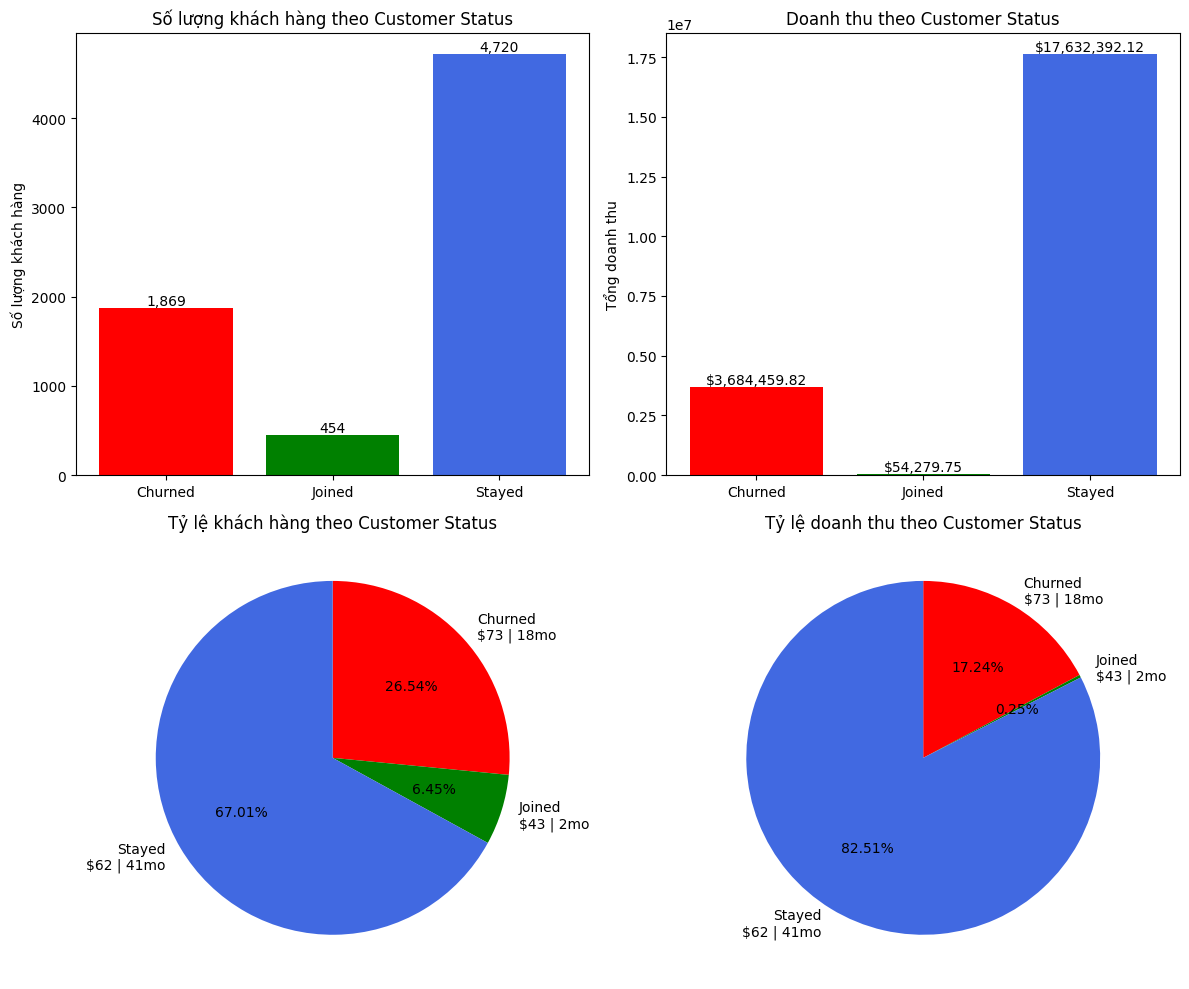

In [30]:
colors = ['red', 'green', 'royalblue']

labels_with_info = [
    f"{status}\n${charge:.0f} | {tenure:.0f}mo"
    for status, charge, tenure in zip(df_percent['Customer Status'],
                                      df_percent['Avg Monthly Charge $'],
                                      df_percent['Avg Tenure (months)'])
]

# Tạo figure 2 hàng x 2 cột
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- Bar 1: Số lượng khách hàng ---
bars1 = axes[0, 0].bar(df_percent['Customer Status'], df_percent['Count'], color=colors)
axes[0, 0].bar_label(bars1, labels=[f"{v:,}" for v in df_percent['Count']], fontsize=10)
axes[0, 0].set_title('Số lượng khách hàng theo Customer Status')
axes[0, 0].set_ylabel('Số lượng khách hàng')

# --- Bar 2: Doanh thu ---
bars2 = axes[0, 1].bar(df_percent['Customer Status'], df_percent['Total Revenue'], color=colors)
axes[0, 1].bar_label(bars2, labels=[f"${v:,}" for v in df_percent['Total Revenue']], fontsize=10)
axes[0, 1].set_title('Doanh thu theo Customer Status')
axes[0, 1].set_ylabel('Tổng doanh thu')

# --- Pie 1: Tỷ lệ khách hàng ---
axes[1, 0].pie(df_percent['Percent'], labels=labels_with_info,
               autopct='%1.2f%%', startangle=90, counterclock=False, colors=colors)
axes[1, 0].set_title('Tỷ lệ khách hàng theo Customer Status')

# --- Pie 2: Tỷ lệ doanh thu ---
axes[1, 1].pie(df_percent['Revenue Percent'], labels=labels_with_info,
               autopct='%1.2f%%', startangle=90, counterclock=False, colors=colors)
axes[1, 1].set_title('Tỷ lệ doanh thu theo Customer Status')

plt.tight_layout()
plt.show()

#**Nhận xét:**
1. Tỷ lệ khách hàng theo Customer Status:
  - Stayed (khách hàng ở lại) chiếm tỷ trọng lớn nhất 67.01%, với phí trung bình $62/tháng và thời gian gắn bó lâu dài (41 tháng).
  → Đây là nhóm trung thành, đóng vai trò quan trọng cho sự ổn định doanh thu dài hạn.

  - Churned (khách hàng rời đi) chiếm 26.54%, với phí trung bình cao $73/tháng nhưng thời gian gắn bó ngắn hơn (18 tháng).
  → Mất nhóm này gây thiệt hại lớn do họ trả phí cao hơn trung bình, cho thấy đây có thể là nhóm khách hàng giá trị cao nhưng không hài lòng ở một số điểm.

  - Joined (khách hàng mới) chỉ chiếm 6.45%, với phí trung bình thấp $43/tháng và mới gắn bó khoảng 2 tháng.
  → Nhóm này chưa đóng góp nhiều vào doanh thu và có rủi ro churn sớm nếu không chăm sóc tốt.

2. Tỷ lệ doanh thu theo tình trạng

  - Stayed mang lại 82.51% tổng doanh thu, tương ứng với quy mô khách hàng lớn và thời gian gắn bó lâu dài.

  - Churned chiếm 17.24% doanh thu, thấp hơn tỷ lệ khách hàng của họ (26.54%) → có thể do thời gian gắn bó ngắn hoặc churn sớm trong chu kỳ thanh toán.

  - Joined gần như không đáng kể (0.25% doanh thu) vì mới tham gia và trả phí thấp.

3. Ý nghĩa kinh doanh

  - Cần giữ chân nhóm Churned giá trị cao (phí $73/tháng) vì họ mang lại lợi nhuận tốt nhưng lại rời đi nhanh.

  - Tăng tốc onboarding cho nhóm Joined để nhanh chóng nâng phí trung bình và kéo dài thời gian gắn bó.

  - Tiếp tục duy trì sự hài lòng của nhóm Stayed vì họ là nguồn doanh thu chủ lực.

  - 26.54% tỷ lệ khách hàng rời đi (churn) là rất cao trong hầu hết các ngành dịch vụ, đặc biệt là với mô hình subscription như viễn thông, internet hoặc bảo hiểm. Với 26.54%, công ty đang ở mức vượt ngưỡng cảnh báo, nghĩa là hơn 1/4 khách hàng đã rời đi trong giai đoạn phân tích. Điều này có thể gây ra:

    - Sụt giảm doanh thu dài hạn nếu tốc độ thu hút khách hàng mới không đủ bù đắp.

    - Chi phí marketing và sales tăng do phải liên tục tìm khách hàng thay thế.

    - Mất khách hàng giá trị cao (như nhóm $73/tháng) làm giảm lợi nhuận.

#**Phân tích, tìm hiểu ai rời bỏ, vì sao rời bỏ, và các đặc điểm nào làm tăng khả năng churn.**

##*Loại bỏ tệp khách hàng Joined mới tham gia để phân tích nhóm khách hàng hiện hữu có tình trạng rời đi (Churned) hoặc tiếp tục ở lại (Stayed) trước khi tiến hành phân tích tỷ lệ Churn*

In [31]:
df_cs = df[df['Customer Status'] != 'Joined']
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 1 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        6589 non-null   object  
 1   Gender                             6589 non-null   object  
 2   Age                                6589 non-null   float64 
 3   Age Group                          6589 non-null   category
 4   Married                            6589 non-null   object  
 5   Number of Dependents               6589 non-null   float64 
 6   City                               6589 non-null   object  
 7   Number of Referrals                6589 non-null   float64 
 8   Tenure in Months                   6589 non-null   float64 
 9   Tenure Group                       6589 non-null   category
 10  Offer                              6589 non-null   object  
 11  Phone Service                      6589 non-null

#1. Số lượng và lý do churn

Bao gồm tình trạng, lý do, lý do cụ thể

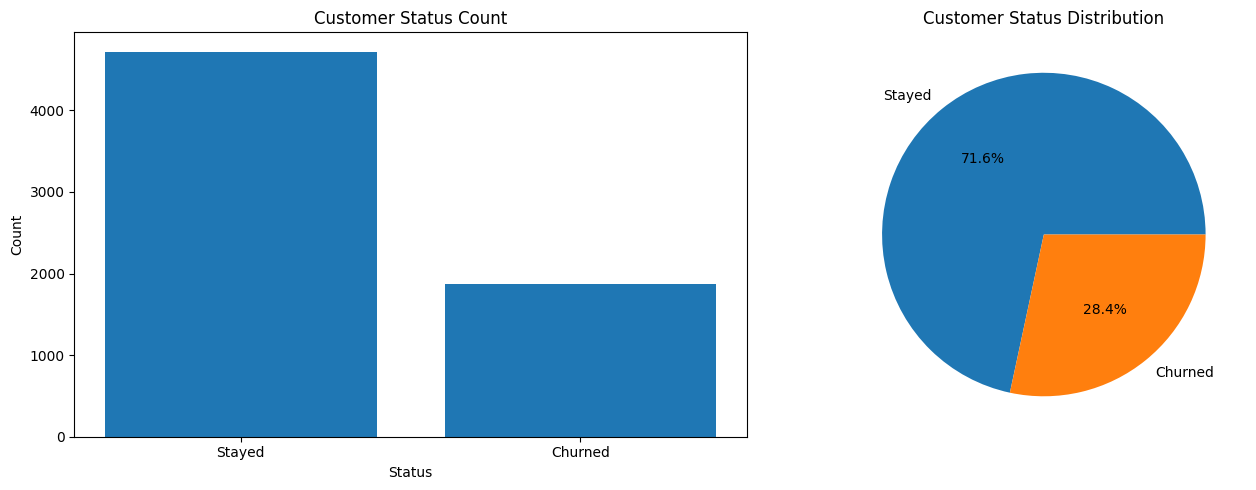

In [32]:
counts = df_cs['Customer Status'].value_counts()
labels = counts.index
sizes = counts.values

plt.figure(figsize=(14,5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(labels, sizes)
plt.title("Customer Status Count")
plt.xlabel("Status")
plt.ylabel("Count")

# Biểu đồ tròn
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Customer Status Distribution")

plt.tight_layout()
plt.show()

In [33]:
df_churn = df_cs[df_cs['Customer Status'] == 'Churned']

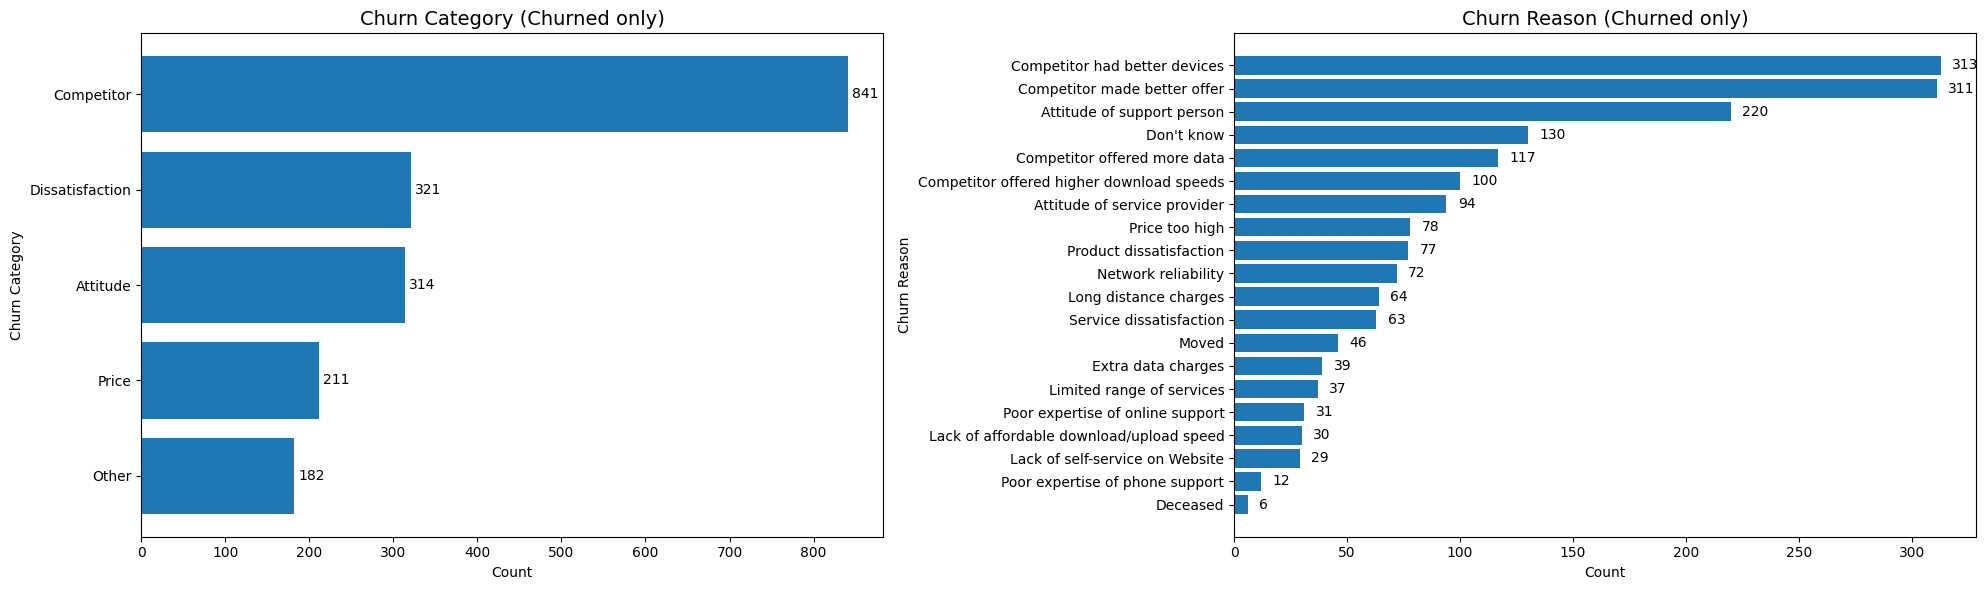

In [34]:
category_counts = df_churn['Churn Category'].value_counts().sort_values()
reason_counts = df_churn['Churn Reason'].value_counts().sort_values()

plt.figure(figsize=(20, 6))

# BIỂU ĐỒ 1: Churn Category
# -------------------------
plt.subplot(1, 2, 1)
bars1 = plt.barh(category_counts.index, category_counts.values)

for bar in bars1:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             str(width), va='center', fontsize=10)

plt.title("Churn Category (Churned only)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Churn Category")

# BIỂU ĐỒ 2: Churn Reason
# -------------------------
plt.subplot(1, 2, 2)
bars2 = plt.barh(reason_counts.index, reason_counts.values)

for bar in bars2:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             str(width), va='center', fontsize=10)

plt.title("Churn Reason (Churned only)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Churn Reason")

plt.tight_layout()
plt.show()

#2. Nhân khẩu học

Bao gồm giới tính, tuổi, tình trạng hôn nhân, thành phố đang ở, nhóm khách có nhiều người phụ thuộc

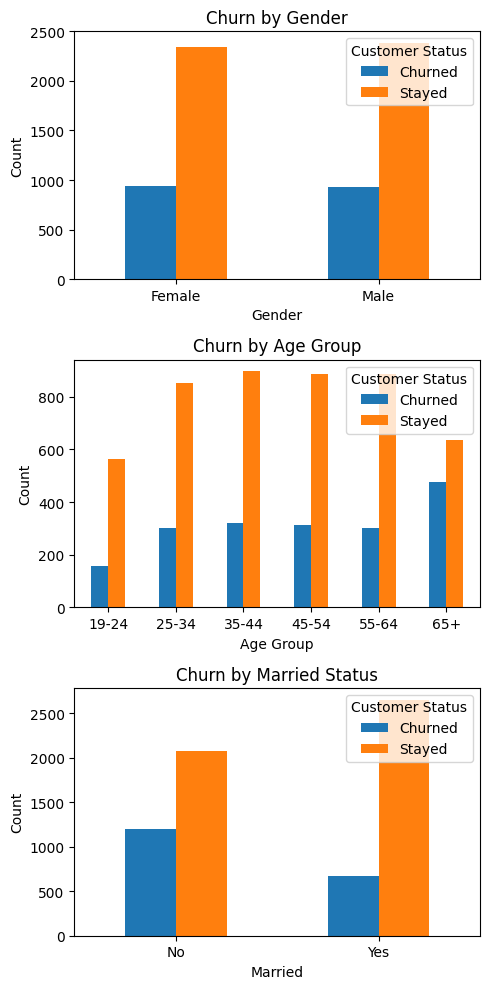

In [35]:
result_gender = df_cs.groupby(['Gender', 'Customer Status']).size().unstack(fill_value=0)

result_age = df_cs.groupby(['Age Group', 'Customer Status']).size().unstack(fill_value=0)

result_married = df_cs.groupby(['Married', 'Customer Status']).size().unstack(fill_value=0)

plt.figure(figsize=(5,10))
# Biểu đồ 1
plt.subplot(3,1,1)
result_gender.plot(kind='bar', ax=plt.gca())
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Biểu đồ 2
plt.subplot(3,1,2)
result_age.plot(kind='bar', ax=plt.gca())
plt.title("Churn by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Biểu đồ 3
plt.subplot(3,1,3)
result_married.plot(kind='bar', ax=plt.gca())
plt.title("Churn by Married Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [36]:
# Lấy top 10 thành phố có nhiều khách hàng nhất
top10_cities = df_cs['City'].value_counts().head(10).index
df_top10 = df_cs[df_cs['City'].isin(top10_cities)]
print("Top 10 Cities:", top10_cities)

Top 10 Cities: Index(['San Diego', 'Los Angeles', 'San Jose', 'Sacramento', 'San Francisco',
       'Fresno', 'Long Beach', 'Escondido', 'Oakland', 'Fallbrook'],
      dtype='object', name='City')


Customer Status  Churned  Stayed  Total  ChurnRate (%)
City                                                  
Escondido             16      32     48      33.333333
Fallbrook             26      15     41      63.414634
Fresno                13      48     61      21.311475
Long Beach            15      43     58      25.862069
Los Angeles           78     197    275      28.363636
Oakland               13      34     47      27.659574
Sacramento            26      76    102      25.490196
San Diego            185      93    278      66.546763
San Francisco         31      66     97      31.958763
San Jose              29      81    110      26.363636


<Figure size 700x500 with 0 Axes>

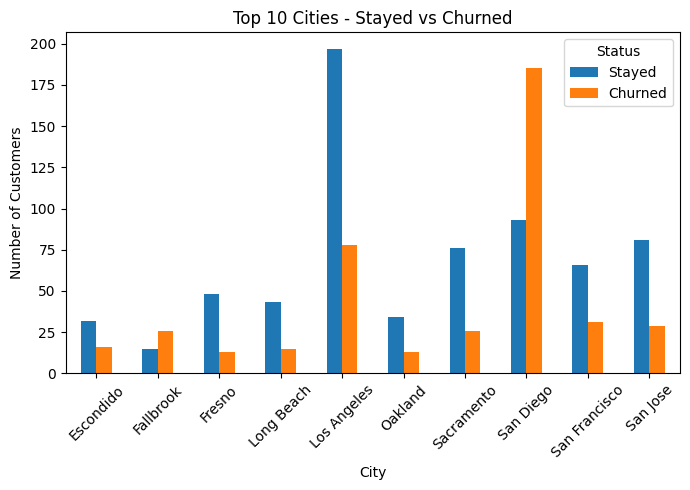

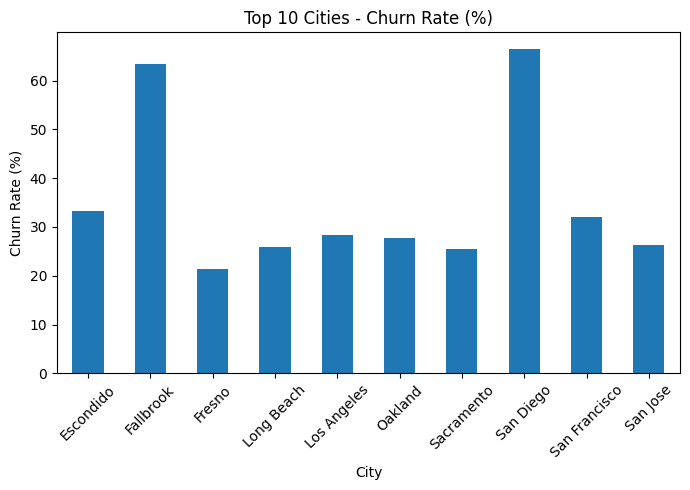

In [37]:
city_churn = (
    df_top10
    .groupby(['City', 'Customer Status'])
    .size()
    .unstack(fill_value=0)
)
city_churn["Total"] = city_churn["Stayed"] + city_churn["Churned"]
city_churn["ChurnRate (%)"] = (city_churn["Churned"] / city_churn["Total"]) * 100
print(city_churn)

# Biểu đồ 1: Số lượng churn theo city
plt.figure(figsize=(7,5))
city_churn[['Stayed', 'Churned']].plot(kind='bar', figsize=(7,5))

plt.title("Top 10 Cities - Stayed vs Churned")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="Status")

plt.tight_layout()
plt.show()

# Biểu đồ 2: Tỷ lệ churn theo city (%)
plt.figure(figsize=(7,5))
city_churn['ChurnRate (%)'].plot(kind='bar')
plt.title("Top 10 Cities - Churn Rate (%)")
plt.xlabel("City")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

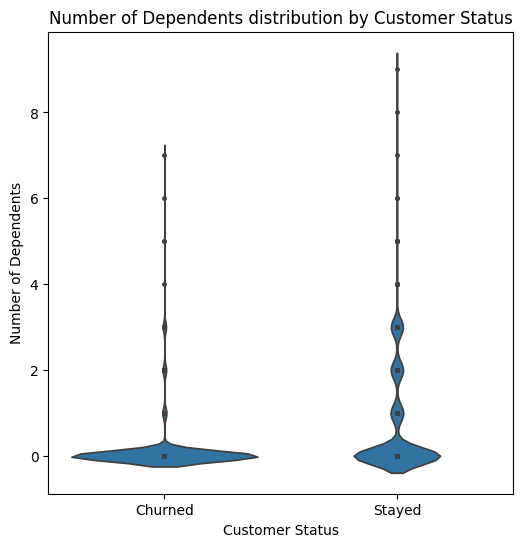

In [46]:
plt.figure(figsize=(6,6))
sns.violinplot(
    data=df_cs,
    x='Customer Status',
    y='Number of Dependents',
    inner='point'   # hiển thị điểm trung tâm giống hình của bạn
)

plt.title("Number of Dependents distribution by Customer Status")
plt.xlabel("Customer Status")
plt.ylabel("Number of Dependents")

plt.show()

##3. Thông tin dịch vụ sử dụng (Service Information)

Bao gồm các dịch vụ điện thoại, internet, các gói và thông tin dịch vụ khác như `Phone Service`, `Internet Service`,`Internet Type`, `Unlimited Data`,`Unlimited Data`, `Streaming TV, Streaming Movies, Streaming Music`,`Online Security, Online Backup, Device Protection Plan, Premium Tech Support`

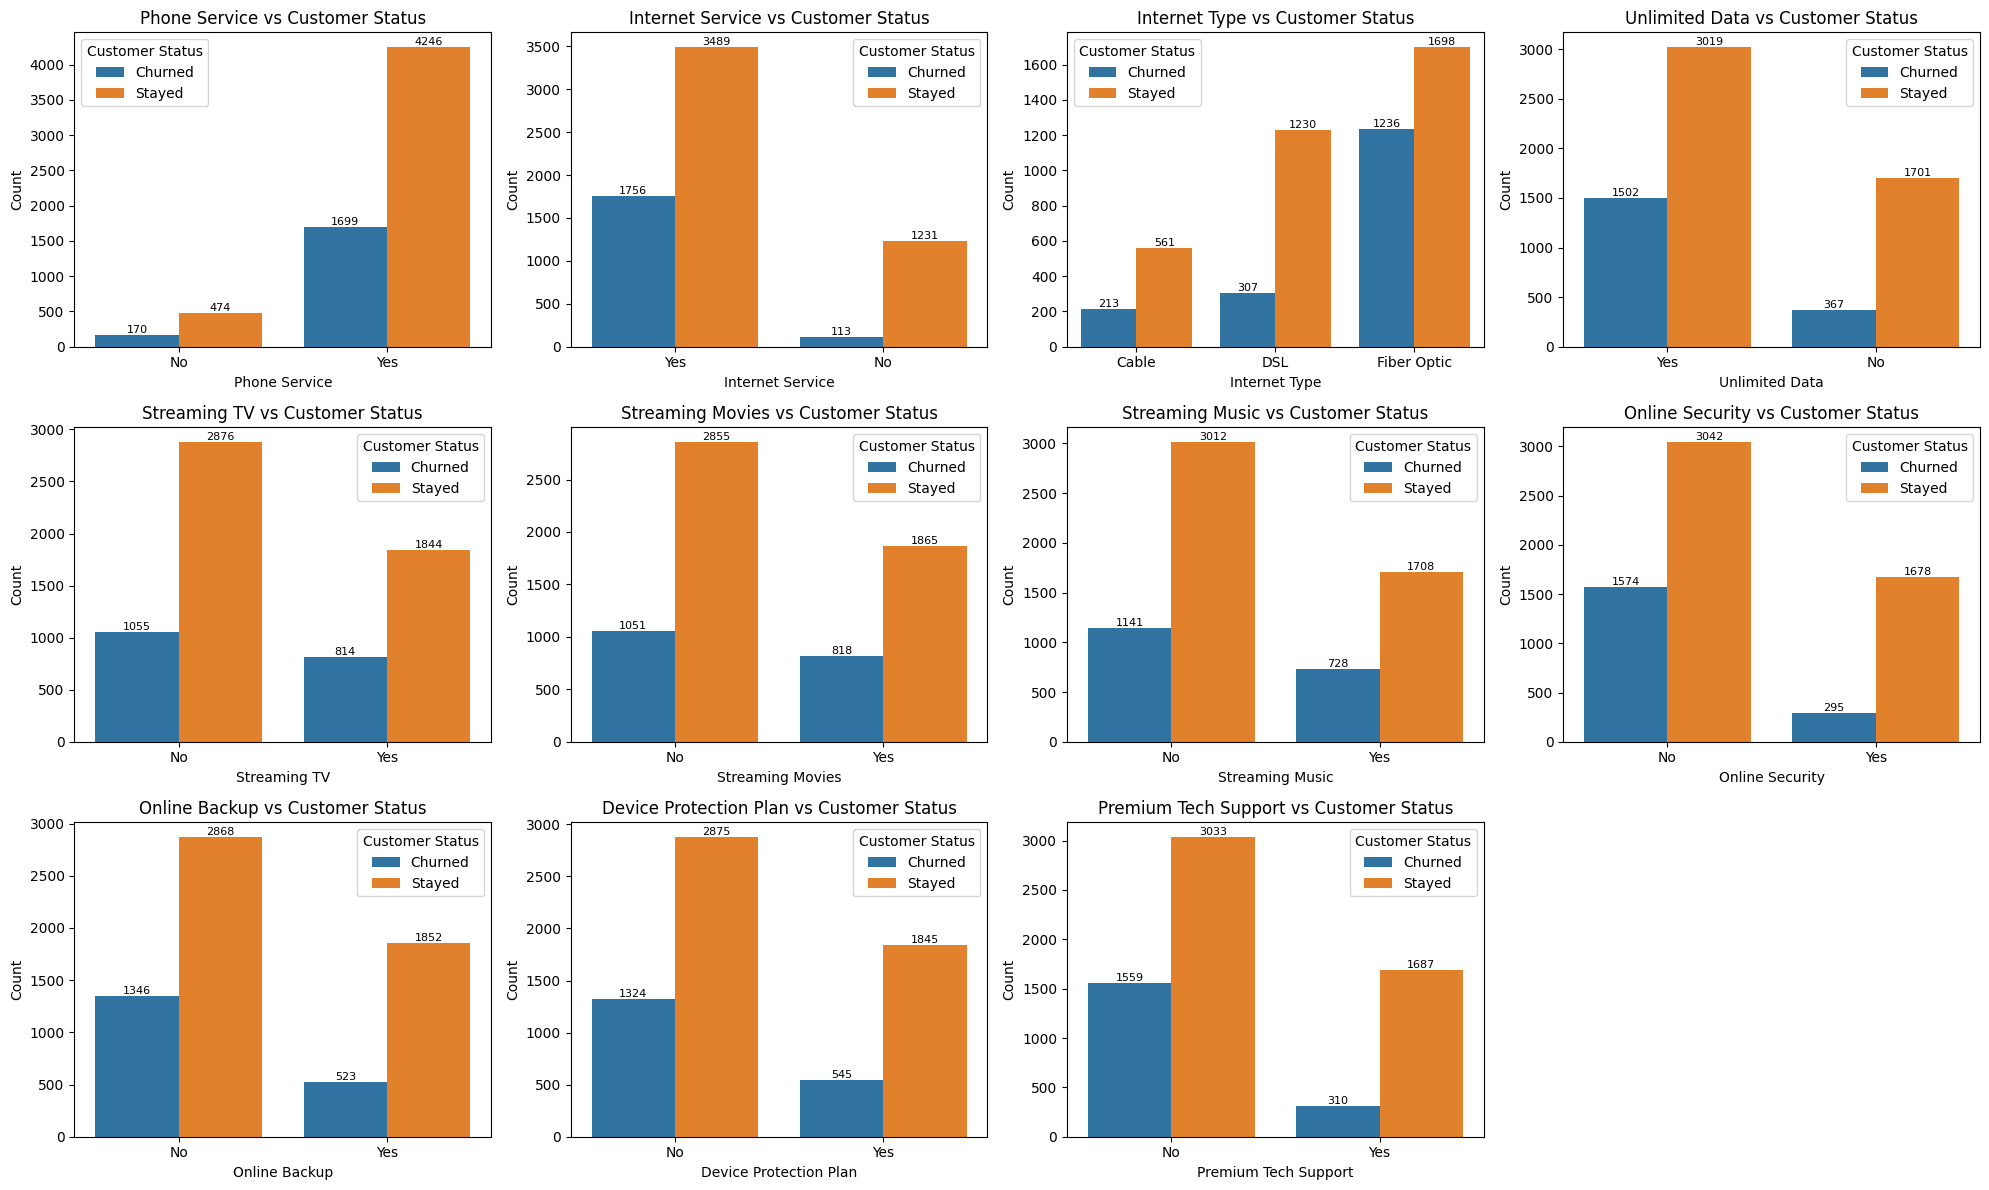

In [47]:
features = [
    'Phone Service',
    'Internet Service',
    'Internet Type',
    'Unlimited Data',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support'
]
rows = 3
cols = 4
plt.figure(figsize=(20, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df_cs, x=feature, hue='Customer Status')

    plt.title(f"{feature} vs Customer Status")
    plt.xlabel(feature)
    plt.ylabel("Count")

    # Hiển thị số trên từng cột
    for container in plt.gca().containers:
        plt.bar_label(container, fontsize=8)

plt.tight_layout()
plt.show()

##4. Thời gian và tương tác (Tenure & Interaction)

Bao gồm các biến `Tenure in Months`, `Tenure Group`, `Number of Referrals`, `Offer`, `Contract`, `Payment Method`

In [54]:
def plot_tenure_combined(df_cs):
    plt.figure(figsize=(25, 6))

    # === 1. Tenure in Months ===
    plt.subplot(1, 3, 1)
    sns.violinplot(
        data=df_cs,
        x='Customer Status',
        y='Tenure in Months',
        inner='point'
    )
    plt.title("Tenure in Months distribution by Customer Status")
    plt.xlabel("Customer Status")
    plt.ylabel("Tenure in Months")

    # === 2. Number of Referrals ===
    plt.subplot(1, 3, 2)
    sns.violinplot(
        data=df_cs,
        x='Customer Status',
        y='Number of Referrals',
        inner='point'
    )
    plt.title("Number of Referrals distribution by Customer Status")
    plt.xlabel("Customer Status")
    plt.ylabel("Number of Referrals")

    # === 3. Tenure Group bar plot ===
    plt.subplot(1, 3, 3)
    sns.countplot(
        data=df_cs,
        x='Tenure Group',
        hue='Customer Status'
    )
    plt.title("Tenure Group vs Customer Status")
    plt.xlabel("Tenure Group")
    plt.ylabel("Count")

    for container in plt.gca().containers:
        plt.bar_label(container, fontsize=8)

    plt.tight_layout()
    plt.show()

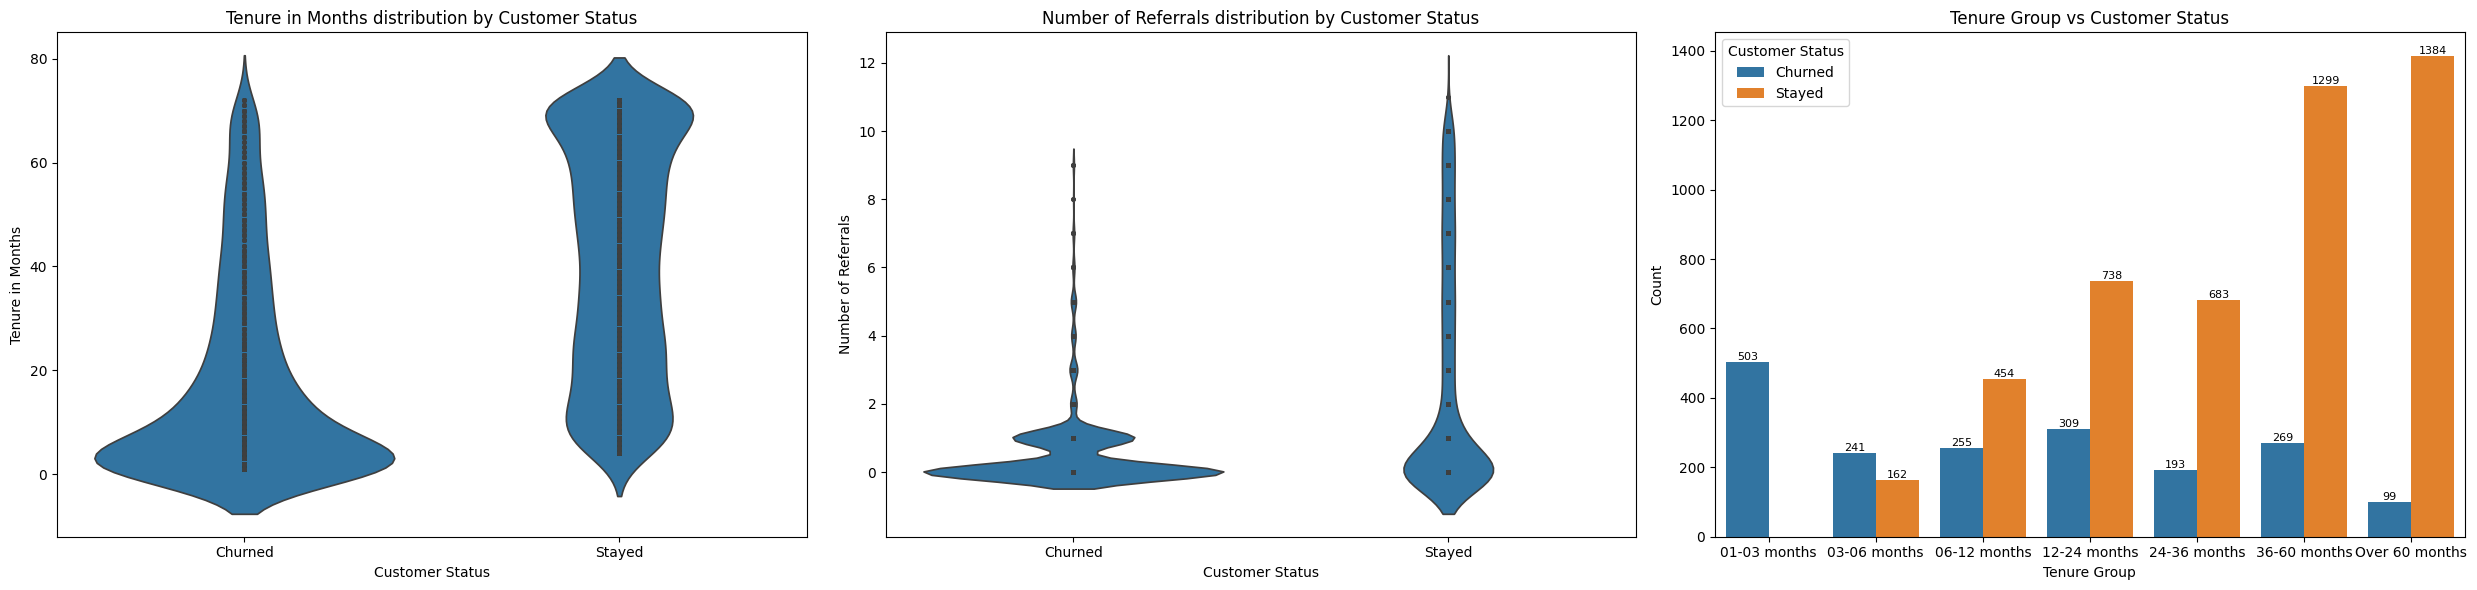

In [55]:
plot_tenure_combined(df_cs)

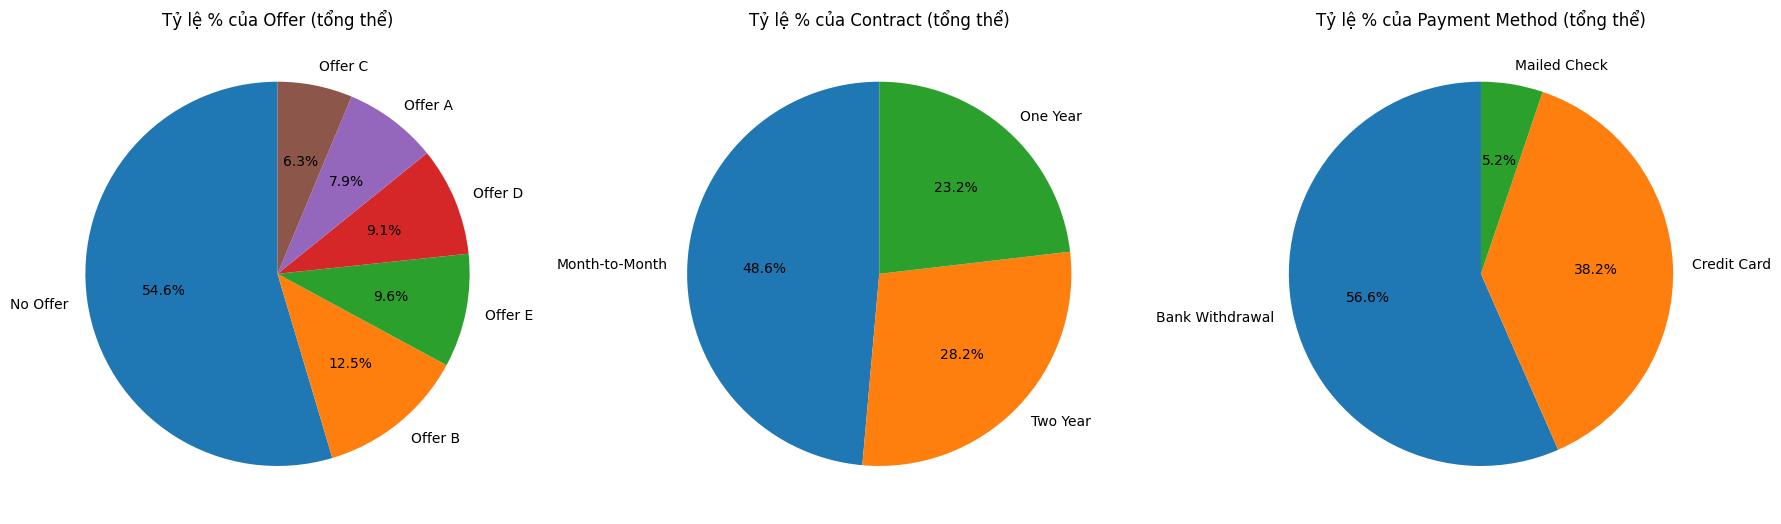

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie 1: Offer
offer_pct = df_cs['Offer'].value_counts(normalize=True) * 100
axes[0].pie(offer_pct, labels=offer_pct.index, autopct='%1.1f%%', startangle=90 )
axes[0].set_title("Tỷ lệ % của Offer (tổng thể)")

# Pie 2: Contract
contract_pct = df_cs['Contract'].value_counts(normalize=True) * 100
axes[1].pie(contract_pct, labels=contract_pct.index, autopct='%1.1f%%', startangle=90 )
axes[1].set_title("Tỷ lệ % của Contract (tổng thể)")

# Pie 3: Payment Method
payment_pct = df_cs['Payment Method'].value_counts(normalize=True) * 100
axes[2].pie(payment_pct, labels=payment_pct.index, autopct='%1.1f%%', startangle=90 )
axes[2].set_title("Tỷ lệ % của Payment Method (tổng thể)")

plt.tight_layout()
plt.show()

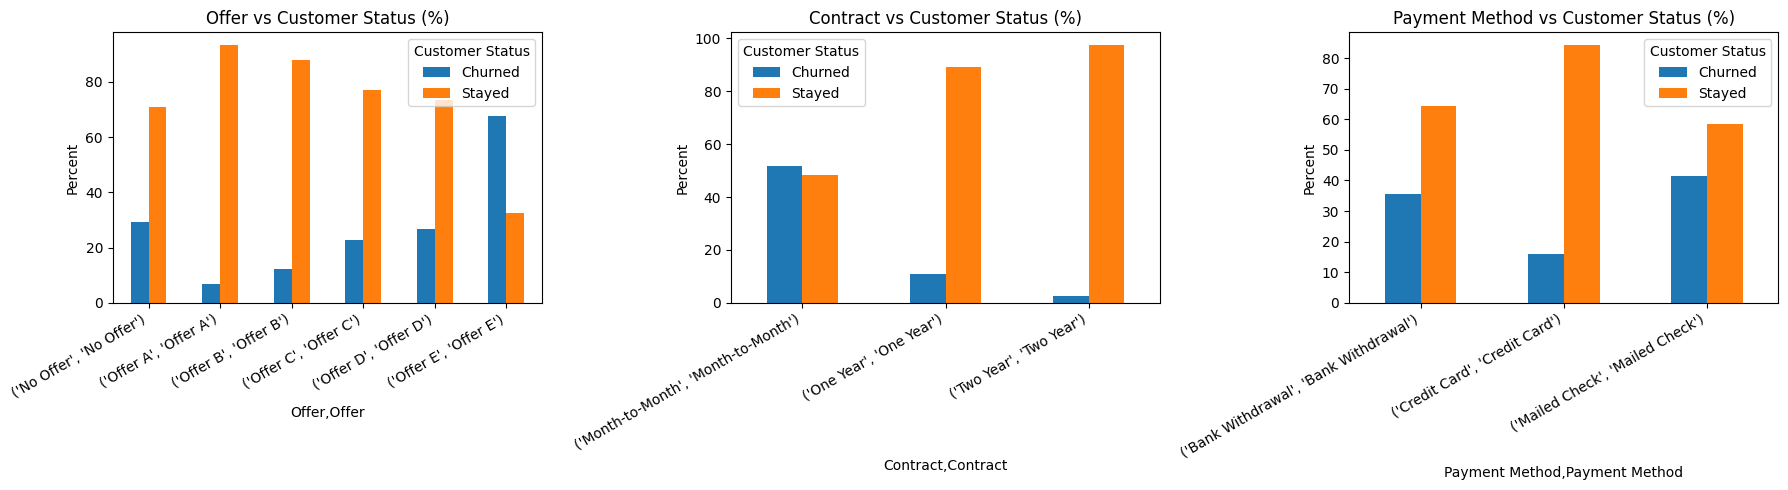

In [70]:
def plot_group_percent(df, col, ax):
    # Tính % theo từng nhóm
    data = (
        df.groupby([col, 'Customer Status'])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
        .unstack()
    )

    data.plot(kind='bar', ax=ax)
    ax.set_title(f"{col} vs Customer Status (%)")
    ax.set_ylabel("Percent")
    ax.set_xticklabels(data.index, rotation=30, ha='right')
    ax.legend(title="Customer Status")

# -------- RUN 3 PLOTS ----------
cols = ["Offer", "Contract", "Payment Method"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, cols):
    plot_group_percent(df_cs, col, ax)

plt.tight_layout()
plt.show()

##5. Thông tin về tài chính

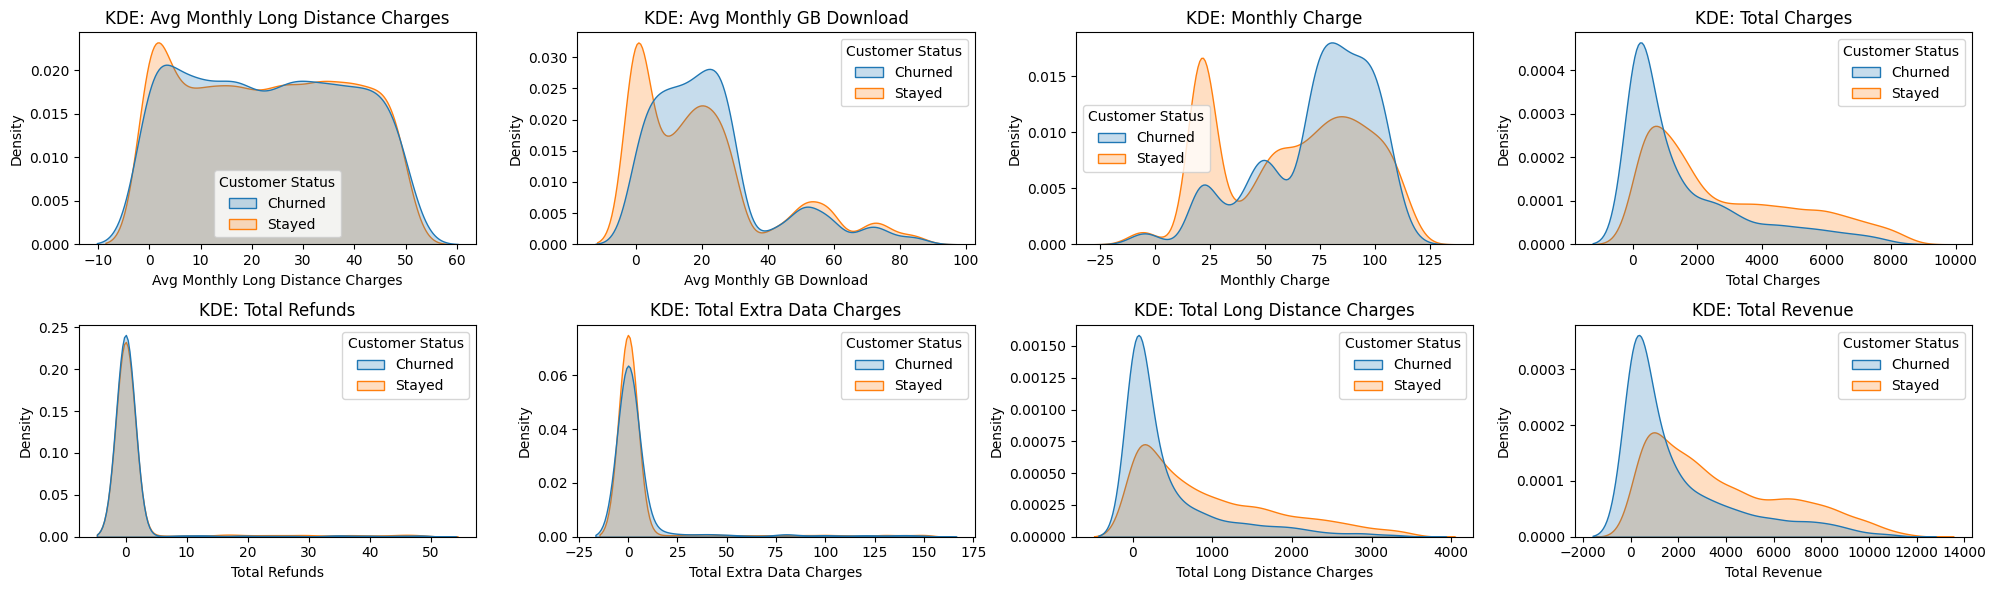

In [73]:
kde_cols = [
    "Avg Monthly Long Distance Charges",
    "Avg Monthly GB Download",
    "Monthly Charge",
    "Total Charges",
    "Total Refunds",
    "Total Extra Data Charges",
    "Total Long Distance Charges",
    "Total Revenue"
]

plt.figure(figsize=(20, 6))

for i, col in enumerate(kde_cols, 1):
    plt.subplot(2, 4, i)
    sns.kdeplot(data=df_cs, x=col, hue="Customer Status", fill=True, common_norm=False)
    plt.title(f"KDE: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()